# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.0.1
Is using GPU? False


# Task 2: Preprocess Data

In [4]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [5]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()
X_train,y_train = get_three_classes(X_train,y_train)
X_test,y_test = get_three_classes(X_test,y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Task 3: Visualize Examples

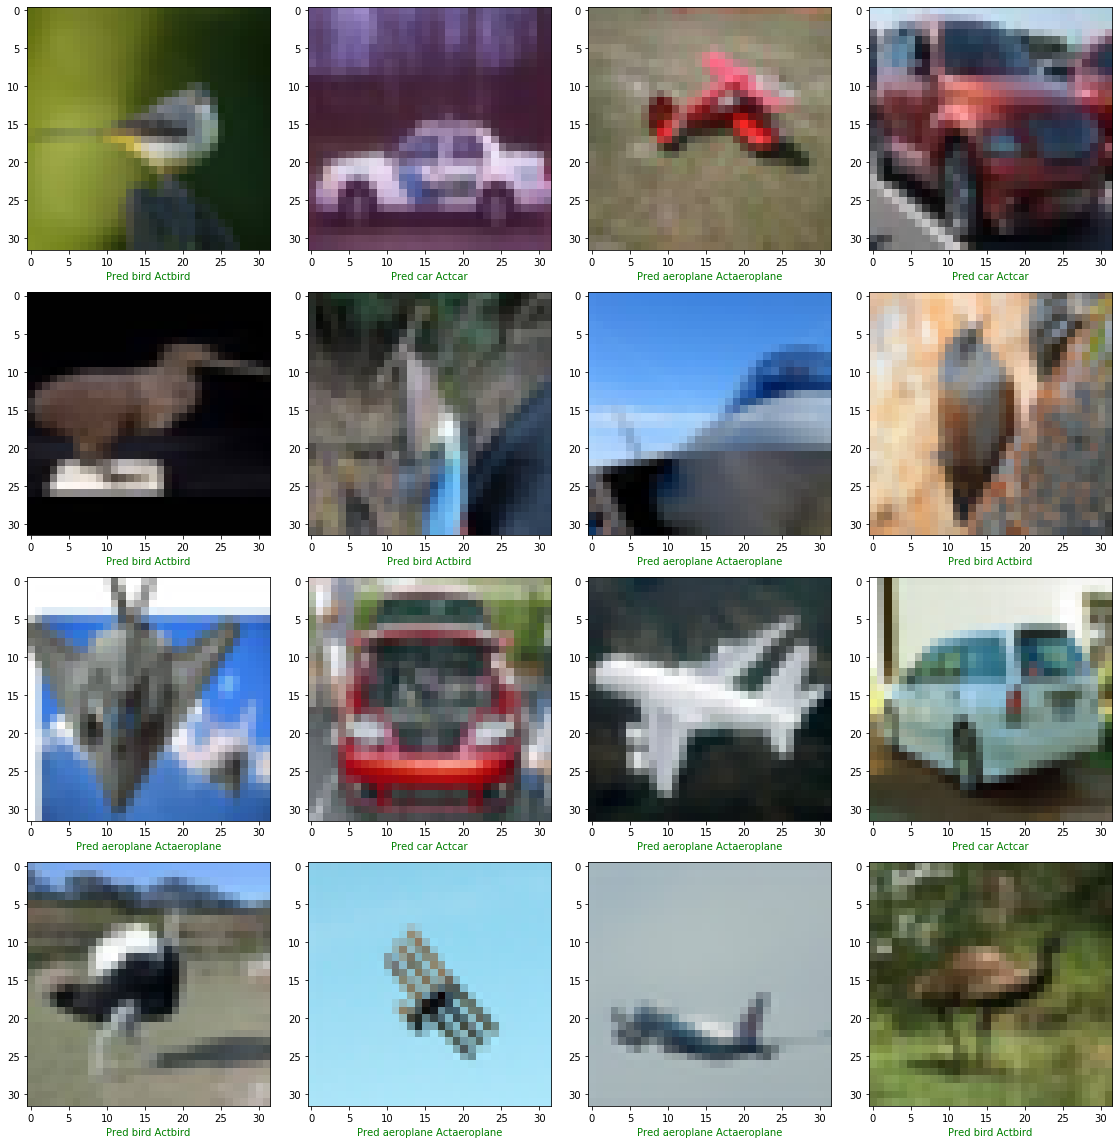

In [16]:
class_names = ['aeroplane', 'car', 'bird']
def show_random_example(X,y,p):
    a=16
    indices = np.random.choice(range(X.shape[0]),a,replace=False)
    X=X[indices]
    y = y[indices]
    p=p[indices]
    plt.figure(figsize=(16,16))
    for i in range (a):
        plt.subplot(4,4,i+1)
        plt.imshow(X[i])
        col="g" if np.argmax(y[i])==np.argmax(p[i]) else "r"
        act = class_names[np.argmax(y[i])]
        pred = class_names[np.argmax(p[i])]
        plt.xlabel("Pred {} Act{}".format(pred,act),color=col)
        plt.tight_layout()
    plt.show()
show_random_example(X_train,y_train,y_train)    

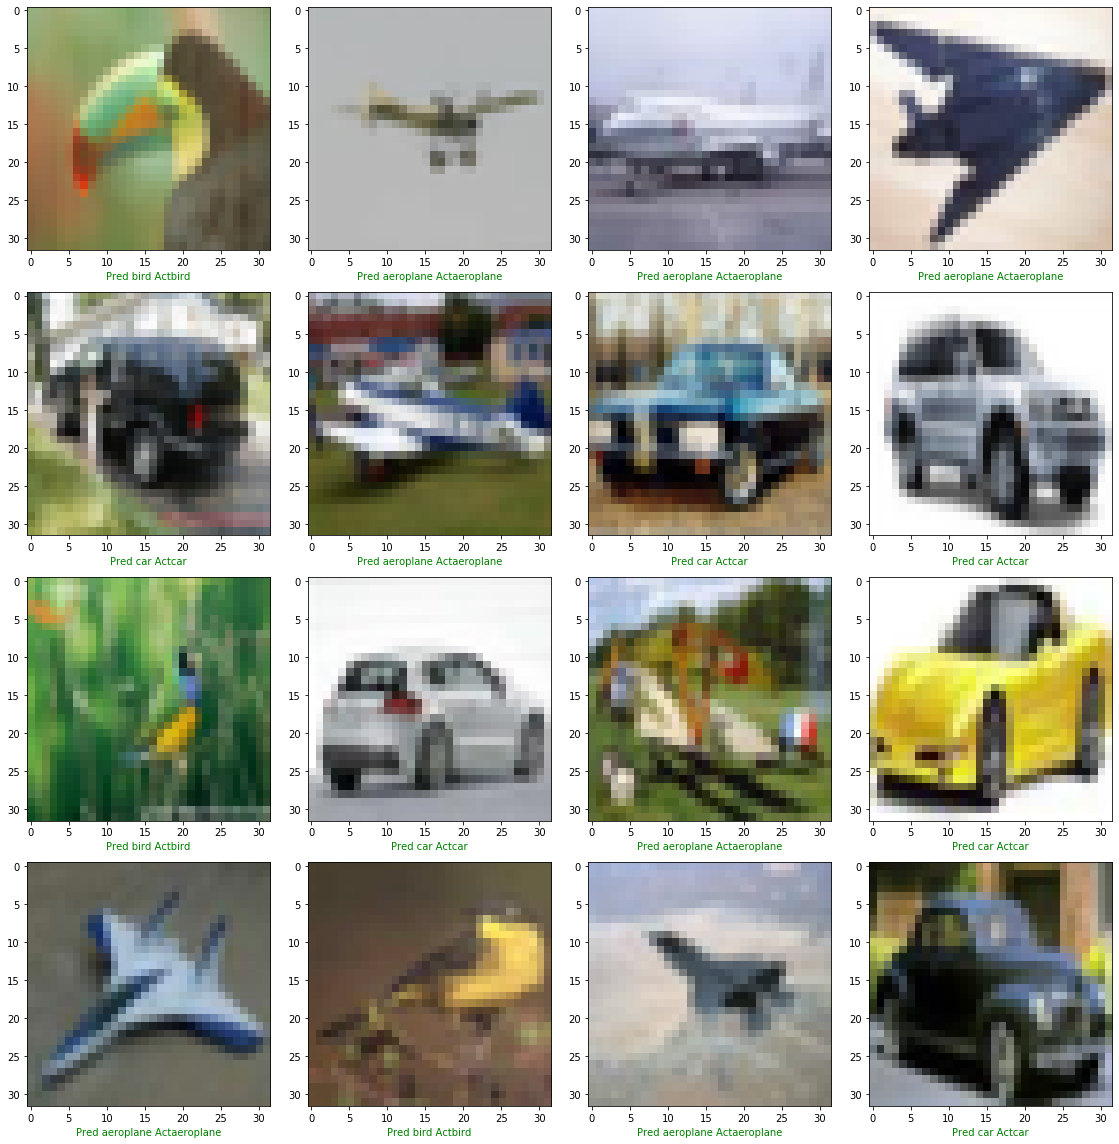

In [19]:
show_random_example(X_test,y_test,y_test) 

# Task 4: Create Model

In [20]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

In [26]:
from tensorflow.keras.models import Sequential
# no_of_filter=16

model = Sequential([
    Conv2D(32,3,activation="relu", padding ="same",input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32,3,activation="relu"),
    MaxPooling2D(pool_size=2),
    Dropout(0.5),
    Conv2D(64,3,activation="relu", padding ="same"),
    BatchNormalization(),
    Conv2D(64,3,activation="relu"),
    MaxPooling2D(pool_size=2),
    Dropout(0.5),
    Conv2D(128,3,activation="relu", padding ="same"),
    BatchNormalization(),
    Conv2D(128,3,activation="relu"),
    MaxPooling2D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(3, activation="softmax")    
])

model.compile(loss= "categorical_crossentropy",
             optimizer = "adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 15, 15, 64)       

# Task 5: Train the Model

In [39]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
model_check = ModelCheckpoint("models/models_{val_accuracy:.3f}.h5",save_best_only=True)
early_stop=EarlyStopping(monitor="val_accuracy", patience =5)
h = model.fit(X_train/255.,y_train,batch_size=64,
          validation_data =(X_test/255.,y_test),
         epochs=20,
         callbacks=[early_stop,model_check]
         )

Train on 15000 samples, validate on 3000 samples
Epoch 1/20
15000/15000 [==============================] - 144s 10ms/sample - loss: 0.2976 - accuracy: 0.8845 - val_loss: 0.4789 - val_accuracy: 0.8460
Epoch 2/20
15000/15000 [==============================] - 143s 10ms/sample - loss: 0.2792 - accuracy: 0.8919 - val_loss: 0.3162 - val_accuracy: 0.8817
Epoch 3/20
15000/15000 [==============================] - 142s 9ms/sample - loss: 0.2676 - accuracy: 0.8946 - val_loss: 0.4121 - val_accuracy: 0.8457
Epoch 4/20
15000/15000 [==============================] - 141s 9ms/sample - loss: 0.2555 - accuracy: 0.9020 - val_loss: 0.2741 - val_accuracy: 0.8927
Epoch 5/20
15000/15000 [==============================] - 142s 9ms/sample - loss: 0.2462 - accuracy: 0.9045 - val_loss: 0.2362 - val_accuracy: 0.9090
Epoch 6/20
15000/15000 [==============================] - 141s 9ms/sample - loss: 0.2391 - accuracy: 0.9077 - val_loss: 0.2890 - val_accuracy: 0.8973
Epoch 7/20
15000/15000 [=========================

# Task 6: Final Predictions

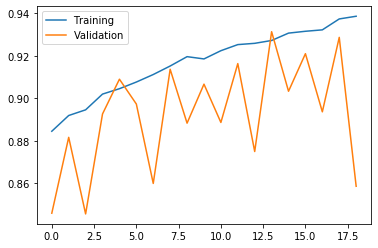

In [41]:
accs=h.history['accuracy']
val_accs=h.history["val_accuracy"]
plt.plot(range(len(accs)),accs, label="Training")
plt.plot(range(len(accs)),val_accs, label="Validation")
plt.legend()
plt.show()

In [42]:
pred = model.predict(X_test/255)

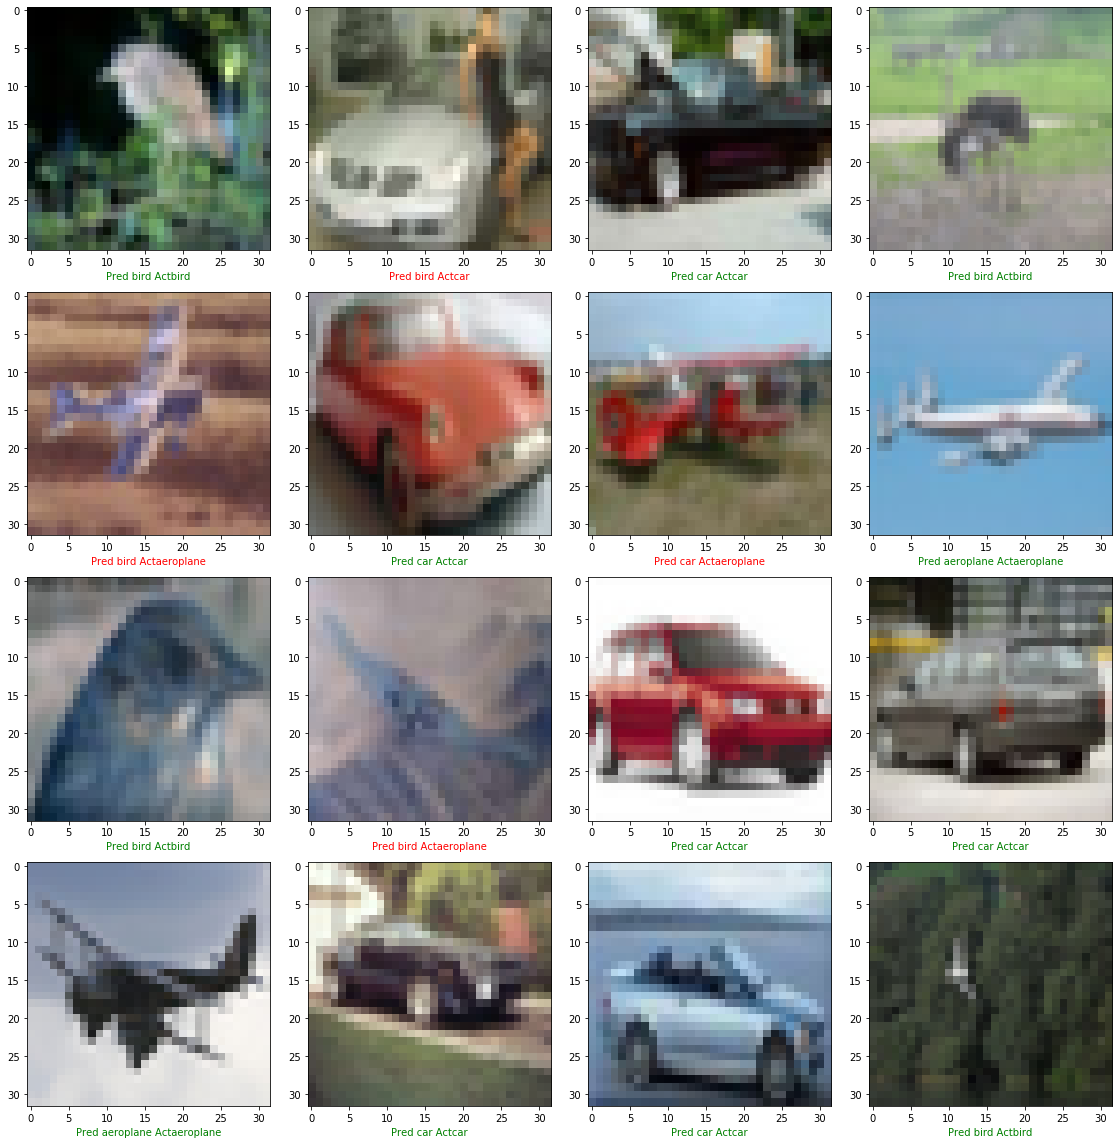

In [44]:
show_random_example(X_test,y_test,pred) 